Introduced with version 2 of TABS is custom TABS (cTABS), which provides a way of analyzing observed conformers in e.g. a MD trajectory through providing custom profiles and automatically fitting with wrapped Gaussians.

In [8]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from tabs import DihedralInfoFromTorsionLib
from tabs import custom
import mdtraj as md
import numpy as np

Building ``mol`` object

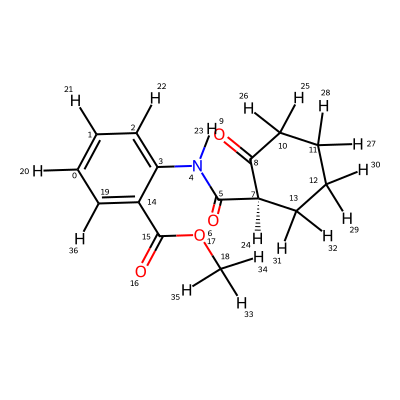

In [9]:
mol = Chem.AddHs(Chem.MolFromSmiles("[H]c1c([H])c([H])c(N([H])C(=O)[C@@]2([H])C(=O)C([H])([H])C([H])([H])C([H])([H])C2([H])[H])c(C(=O)OC([H])([H])[H])c1[H]"))
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 400,400
mol

Building ``DihedralsInfo`` class object

In [10]:
info = DihedralInfoFromTorsionLib(mol)

In [11]:
info.GetnTABS()

360

In [12]:
info.smarts, info.indices, info.multiplicities, info.bounds, info.torsionTypes

(['[O:1]=[C:2]!@;-[O:3]~[C:4]',
  '[$(C=O):1][NX3:2]!@;-[!#1:3][!#1:4]',
  '[O:1]=[CX3:2]!@;-[NX3H1:3][!#1:4]',
  '[C:1][CX4:2]!@;-[CX3:3]=[O:4]',
  '[$([cH0]!@;-[*^2]):1][c:2]([cH1])!@[CX3:3]=[O:4]',
  '[!#1;r{5-8}:1]@[C^2;r{5-6}:2]@;-[C;r{5-6}:3]@[!#1;r{5-8}:4]',
  '[!#1;r{5-8}:1]@[C^2;r{5-6}:2]@;-[C;r{5-6}:3]@[!#1;r{5-8}:4]',
  '[C^2,c,x4;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
  '[C^2,c,x4;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
  '[!#1;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
  '[!#1;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]'],
 [[16, 15, 17, 18],
  [5, 4, 3, 2],
  [6, 5, 4, 3],
  [8, 7, 5, 6],
  [3, 14, 15, 16],
  [7, 8, 10, 11],
  [10, 8, 7, 13],
  [8, 7, 13, 12],
  [8, 10, 11, 12],
  [7, 13, 12, 11],
  [10, 11, 12, 13]],
 [1, 4, 1, 3, 2, 3, 3, 6, 6, 3, 3],
 [array([3.14159265]),
  array([0.78539816, 2.35619449, 3.92699082, 5.49778714]),
  array([3.14159265]),
  array([1.04719755, 3.14159265, 5.21853446]),
  

Reading in the torsion profiles as observed in the trajectory. 

Note: It needs to be ensured that the atom numbering in the trajectory file and the mol object is the same. Alternatively, a per hand curated list of dihedrals can be provided.

In [13]:
customProfiles = custom.GetTorsionProfilesFromMDTraj(md.load("../Data/Tests/traj.h5"), info.indices)

For demostration reasons only: Calculating profile and fit for a single dihedral

In [14]:
binsize = np.pi*2/36
yHists, yHistsCount, xHist = custom.ComputeTorsionHistograms(customProfiles,binsize)

In [15]:
from tabs import fits

In [16]:
coeffs, peaks = custom.ComputeGaussianFit(xHist,yHists[3],yHistsCount[3],binsize)
xFit = np.linspace(0, 2*np.pi, 4*len(xHist))
yFit = fits.FitFunc.GAUSS.call(coeffs, xFit)

Text(0.5, 1.0, 'Dihedral [8,7,5,6] in water')

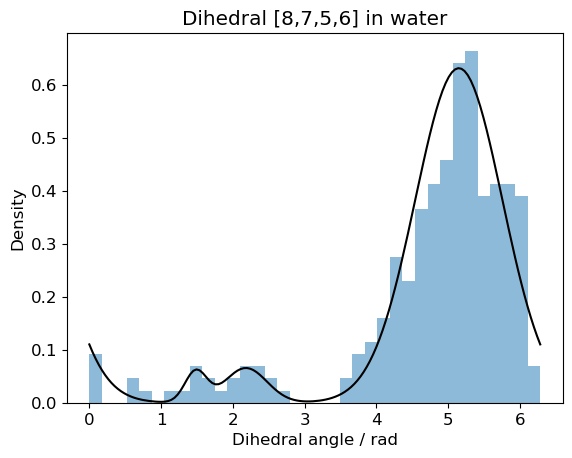

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(xHist, yHists[3], width=binsize, alpha=0.5, label='histogram')
ax.plot(xFit, yFit, color='black', label='fit')
ax.set_xlabel('Dihedral angle / rad')
ax.set_ylabel('Density')
ax.set_title('Dihedral [8,7,5,6] in water')

Getting the ``DihedralInfo`` class object populated by the torsions observed in the trajectory.

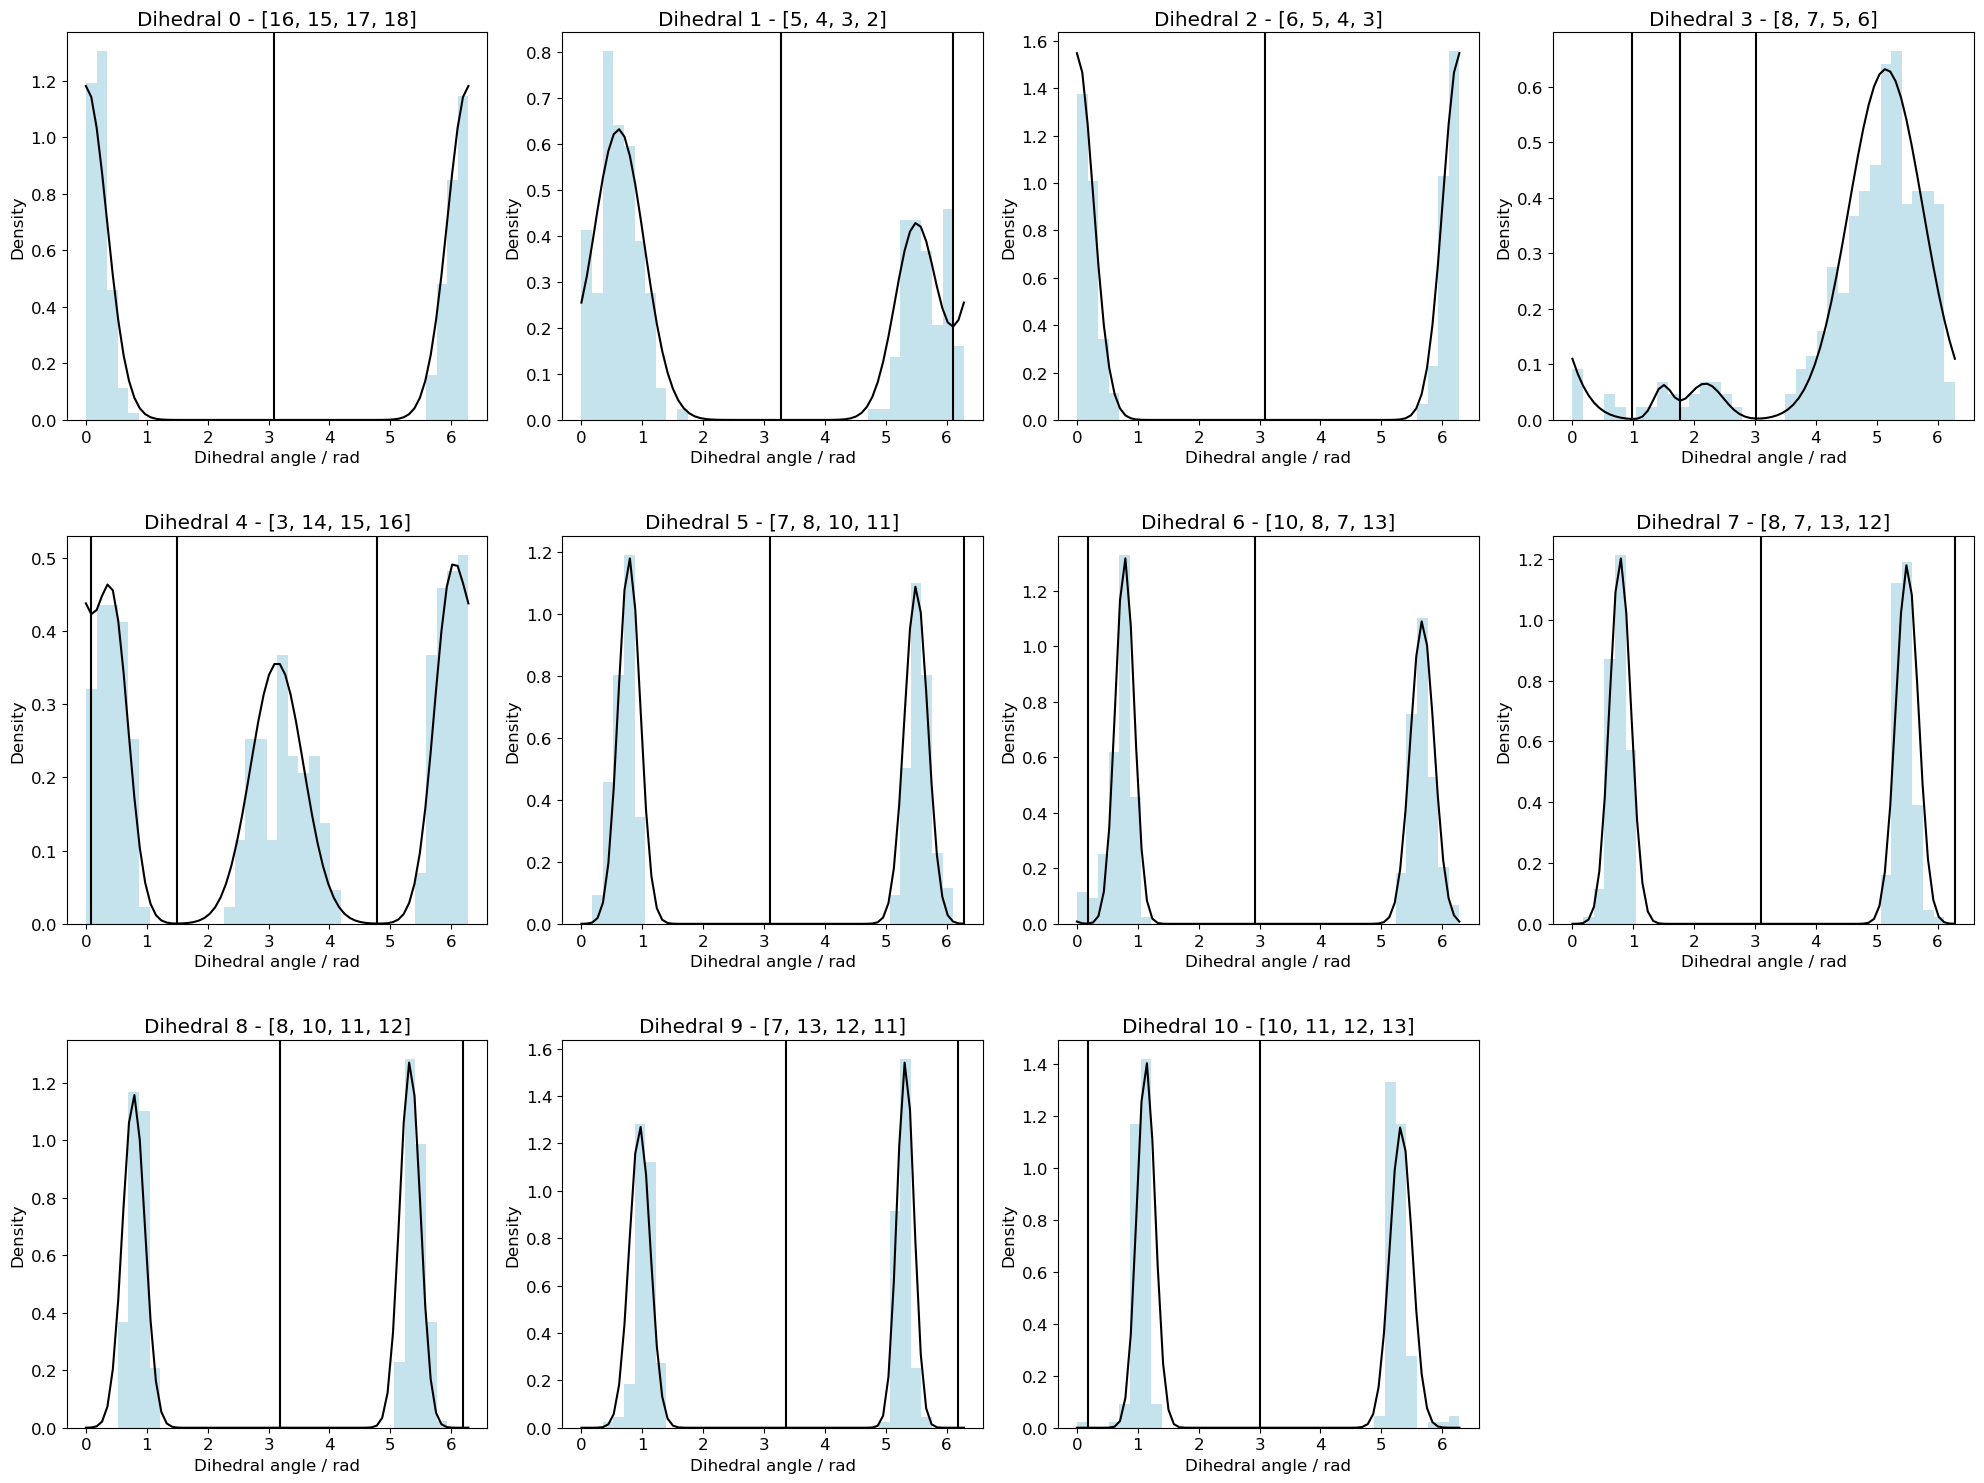

In [20]:
info2 = custom.CustomDihedralInfo(mol, info.indices, customProfiles, showFits=True)

When using the custom functionality, all torsion types are marked as `USER_DEFINED`

In [21]:
info2.torsionTypes

[<TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>]

Getting the customTABS

In [25]:
info2.GetTABS(confTorsions=customProfiles)

[11113122212,
 11133222111,
 12113222111,
 11112222111,
 12113111222,
 12113111222,
 11111222111,
 11112222111,
 11111111222,
 11112111222,
 11113112211,
 11111222111,
 11111111222,
 11112222111,
 11113111222,
 11112111222,
 12131222111,
 12122222111,
 11111222111,
 12113222111,
 11112212111,
 12121111222,
 12112222111,
 12111222111,
 11111222111,
 12113111222,
 11113222111,
 12113222111,
 12113222111,
 11113111222,
 12113111222,
 11111222111,
 12112222111,
 11113222111,
 11113111222,
 11113222111,
 12113111222,
 12112222111,
 12132222111,
 12113111222,
 11111111222,
 12132222111,
 11112222111,
 11113111222,
 11111222111,
 12111111222,
 12111222111,
 11111222111,
 11111111222,
 12112222111,
 11111222111,
 11113222111,
 11113222111,
 11111111222,
 11112222111,
 12112111222,
 11113111222,
 11112222111,
 11113111222,
 11113111222,
 11111222111,
 11113111222,
 12112111222,
 11111111222,
 12113111222,
 11112111222,
 11111222111,
 11111222111,
 11111111222,
 12112111222,
 12112222111,
 11111

Besides the visual inspection, the bound values can also be directly accessed.

In [57]:
for b, idx in zip(info2.indices, info2.bounds):
    print(f'Indices: {b}, Bounds: {idx}')

Indices: [16, 15, 17, 18], Bounds: [np.float64(2.566371463495887), np.float64(3.716813843683699)]
Indices: [5, 4, 3, 2], Bounds: [np.float64(1.7699113541350946), np.float64(3.097344869736416), np.float64(4.601769520751247), np.float64(6.283185307179586)]
Indices: [6, 5, 4, 3], Bounds: [np.float64(3.097344869736416)]
Indices: [8, 7, 5, 6], Bounds: [np.float64(0.7964601093607926), np.float64(3.1858404374431704)]
Indices: [3, 14, 15, 16], Bounds: [np.float64(0.0), np.float64(1.5929202187215852), np.float64(3.097344869736416), np.float64(4.690265088458001)]
Indices: [7, 8, 10, 11], Bounds: [np.float64(3.1858404374431704), np.float64(6.194689739472832)]
Indices: [10, 8, 7, 13], Bounds: [np.float64(0.0), np.float64(3.2743360051499253)]
Indices: [8, 7, 13, 12], Bounds: [np.float64(0.0), np.float64(3.008849302029661)]
Indices: [8, 10, 11, 12], Bounds: [np.float64(3.097344869736416), np.float64(6.283185307179586)]
Indices: [7, 13, 12, 11], Bounds: [np.float64(3.2743360051499253), np.float64(6.1

There are two hyperparameter to optimize the fits on a case basis:

* excludePeaks: default=1e-4, peaks lower will not be considered
* prominence : default=1e-4, required stand out of peak from surroundings

Here, increasing the threshold values changes the fit of dihedral 3

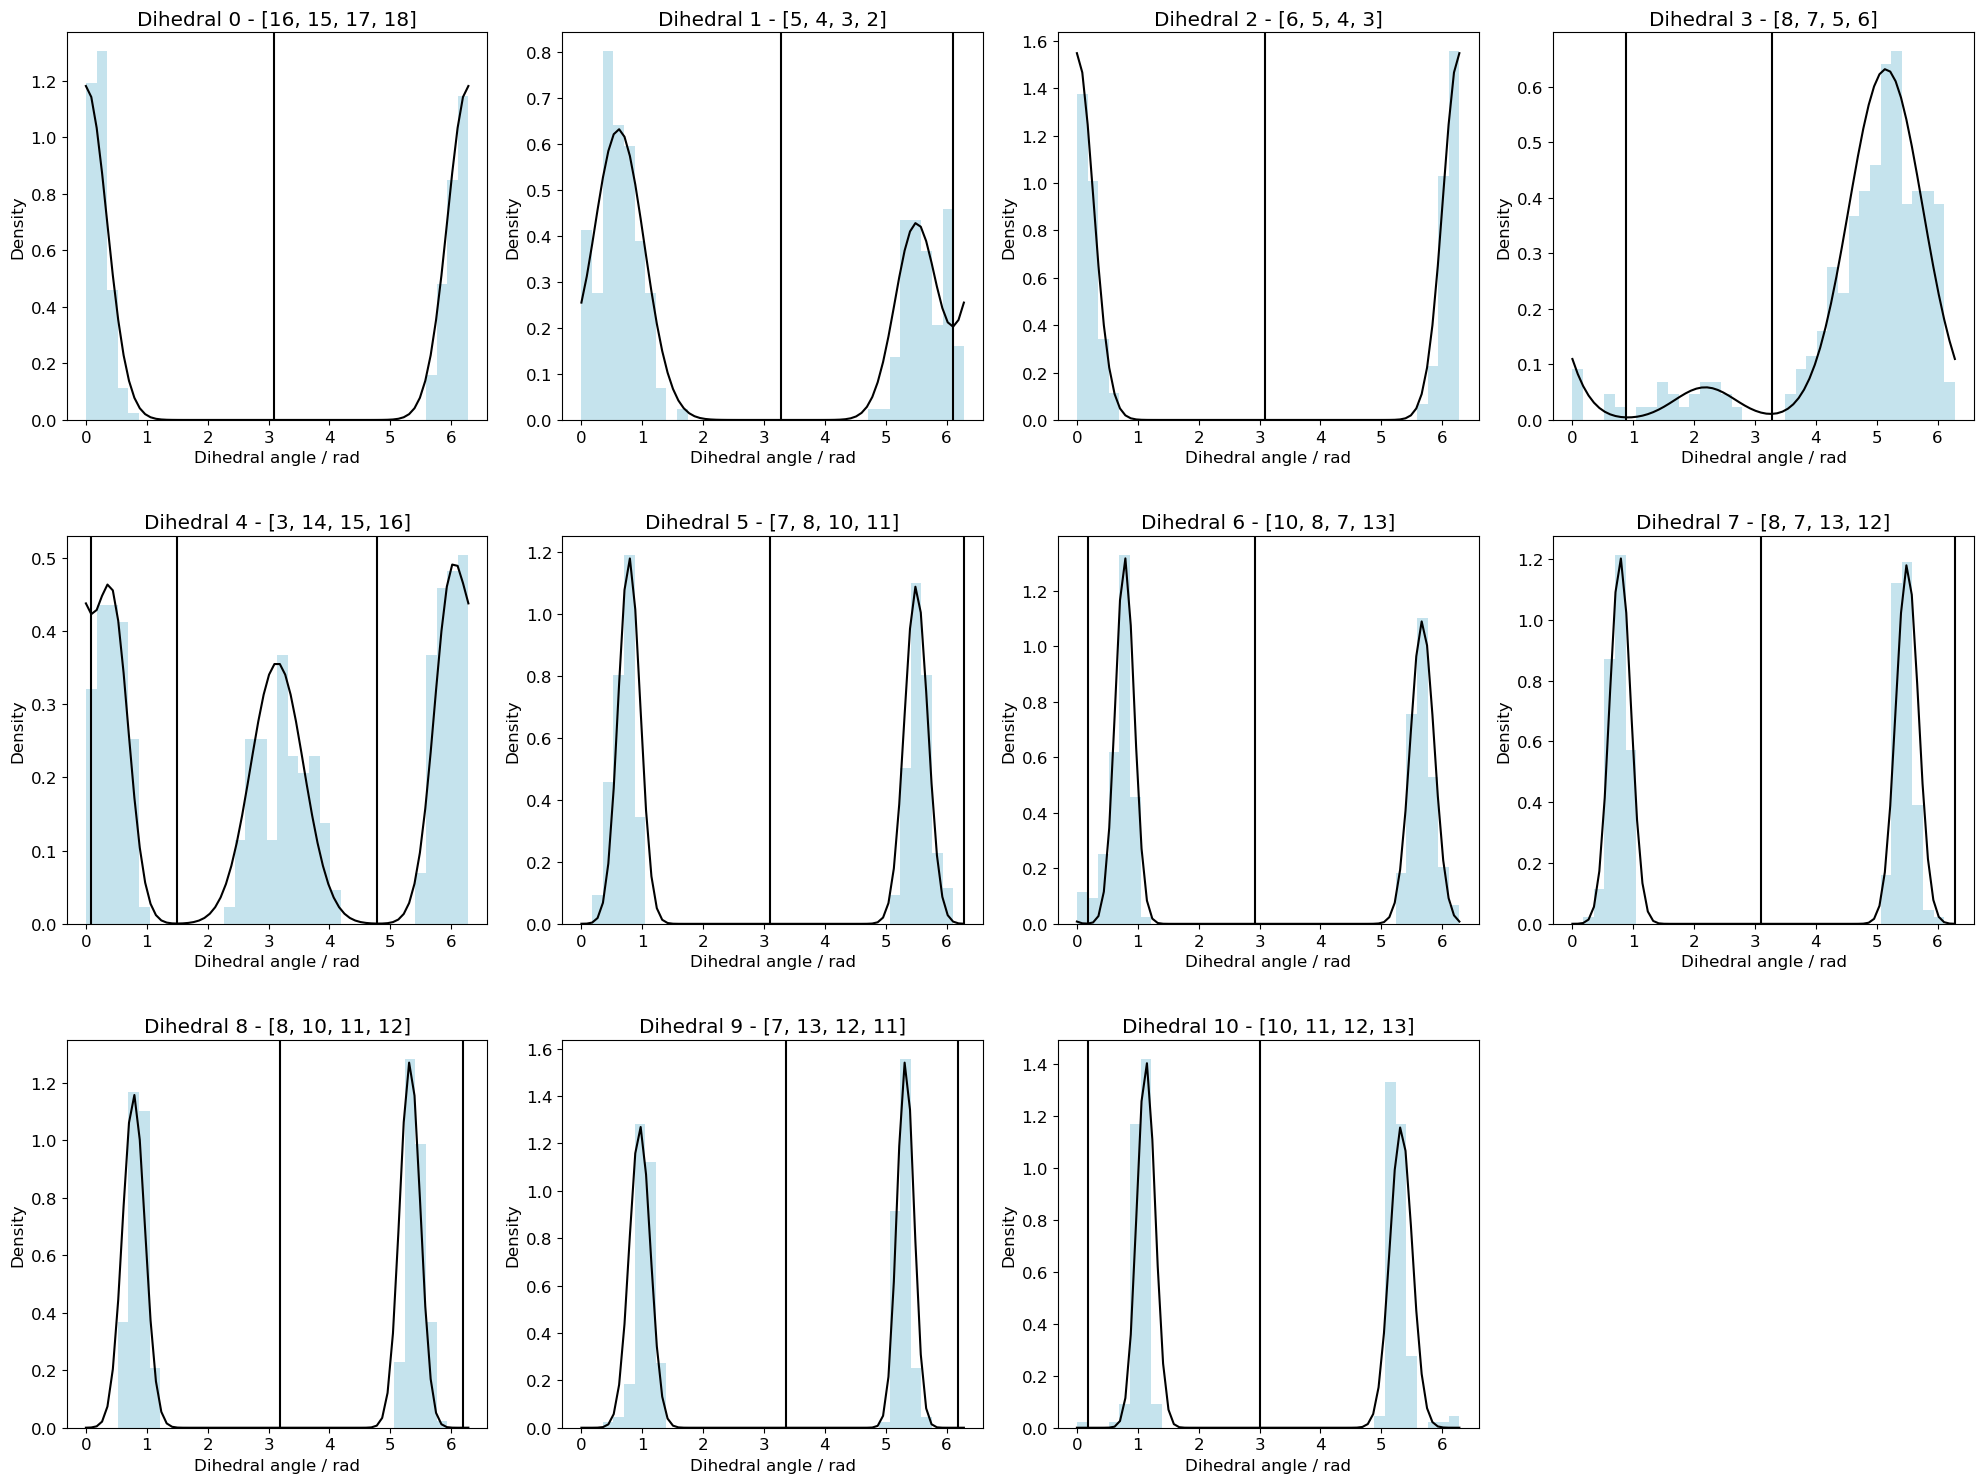

In [23]:
info3 = custom.CustomDihedralInfo(mol, info.indices, customProfiles, showFits=True, excludePeaks=1e-2, prominence=1e-2)

It also possible to compare the experimental torsion bins with the newly assigned custom bins in 2d histograms.

In [63]:
def Shift(x):
    # for array x check for every single entry if larger than 180, then subtract from 360
    return np.array([angle-360 if angle>180 else angle for angle in x])

Text(0.5, 1.0, 'customTABS')

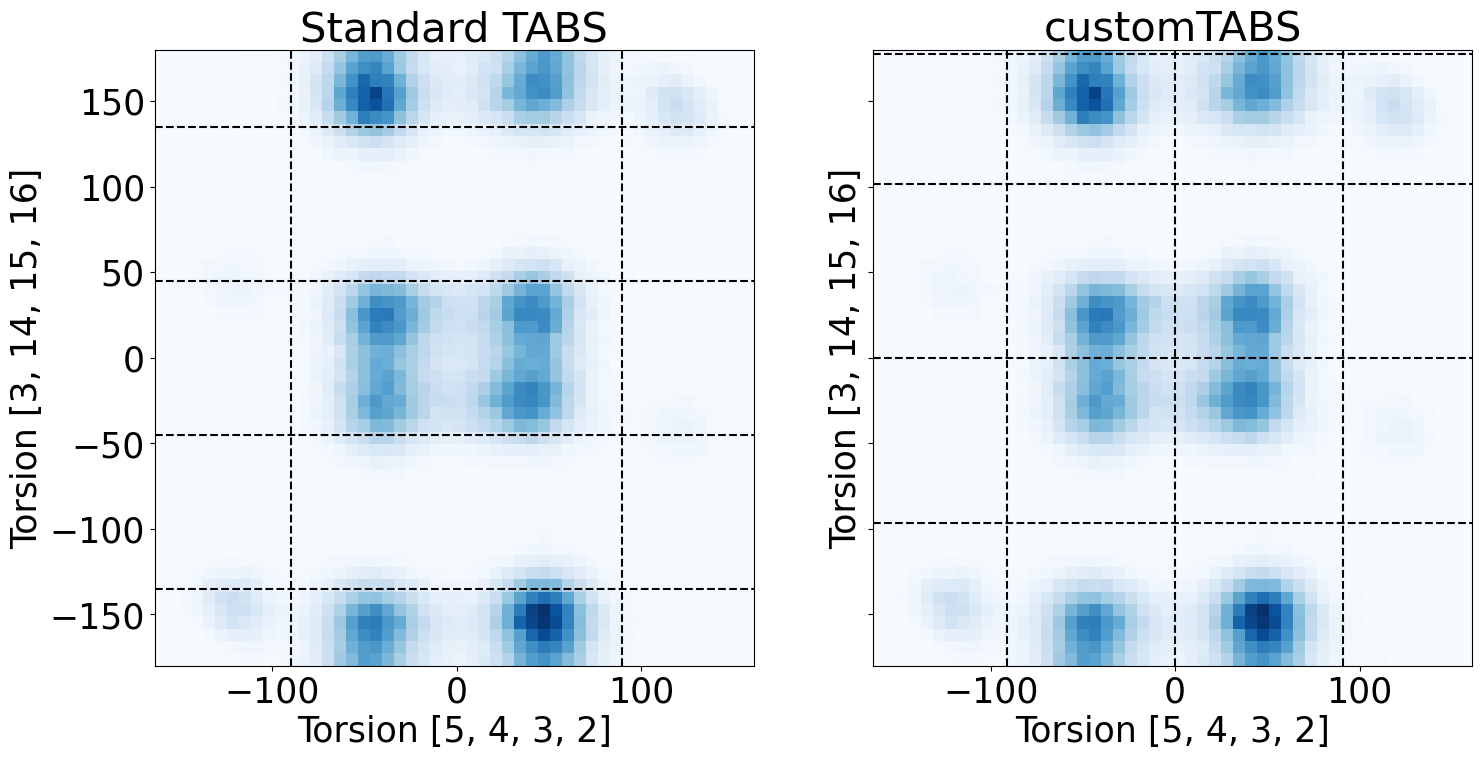

In [ ]:
#plot 2d histograms for two selected dihedrals
fig, ax = plt.subplots(1, 2, figsize=(17,8), sharey=True)
ax[0].hist2d(Shift(np.rad2deg(customProfiles[:,1])), Shift(np.rad2deg(customProfiles[:,4])), bins=50, cmap='Blues')
ax[0].set_xlabel(f"Torsion {info.indices[1]}")
ax[0].set_ylabel(f"Torsion {info.indices[4]}")
#add horizontal line (binning on 3, 14, 15,16)
for bound in info.bounds[1]:
    ax[0].axhline(y=Shift([np.rad2deg(bound)])[0], color='black', linestyle='--')
for bound in info.bounds[4]:
    ax[0].axvline(x=Shift([np.rad2deg(bound)])[0], color='black', linestyle='--')
ax[0].set_title("Standard TABS")

ax[1].hist2d(Shift(np.rad2deg(customProfiles[:,1])), Shift(np.rad2deg(customProfiles[:,4])), bins=50, cmap='Blues')
ax[1].set_xlabel(f"Torsion {info2.indices[1]}")
ax[1].set_ylabel(f"Torsion {info2.indices[4]}")
#add horizontal line (binning on 3, 14, 15,16)
for bound in info2.bounds[1]:
    ax[1].axhline(y=Shift([np.rad2deg(bound)])[0], color='black', linestyle='--')
for bound in info2.bounds[4]:
    ax[1].axvline(x=Shift([np.rad2deg(bound)])[0], color='black', linestyle='--')
ax[1].set_title("customTABS")